In [7]:
!pip install tensorflow_datasets
print("listo")

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 5.4/5.4 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 135.8/135.8 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 101.3/101.3 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 227.6/227.6 kB 2.8 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21548 sha256=1746074ada31a2205df983db706279739be6670cf2bd2522c5d60f089ec00fe6
  Stored in directory: c:\users\edgar\appdata\local\pip\cache\wheels\76\40\54\417a4d64a01b61b247658d83597e1dc83c3de01fc0cef44972
Successfully built promise


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
listo


In [1]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
print("listo")

listo


In [3]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='C:\\Users\\Edgar\\Desktop\\DMML',

)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(64)
test_dataset = test_dataset.map(preprocess_image).batch(64)

print("listo")


listo


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
print("listo")

listo


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)
print("listo")

Epoch 1/10
39/39 [==============================] - 267s 7s/step - loss: 4.6613 - accuracy: 0.0262 - val_loss: 4.4324 - val_accuracy: 0.0621
Epoch 2/10
39/39 [==============================] - 259s 7s/step - loss: 3.8858 - accuracy: 0.1651 - val_loss: 3.9697 - val_accuracy: 0.1552
Epoch 3/10
39/39 [==============================] - 258s 7s/step - loss: 2.0802 - accuracy: 0.5206 - val_loss: 3.7309 - val_accuracy: 0.2663
Epoch 4/10
39/39 [==============================] - 252s 6s/step - loss: 0.6416 - accuracy: 0.8427 - val_loss: 4.9801 - val_accuracy: 0.2925
Epoch 5/10
39/39 [==============================] - 253s 6s/step - loss: 0.1910 - accuracy: 0.9591 - val_loss: 6.3154 - val_accuracy: 0.2745
Epoch 6/10
39/39 [==============================] - 249s 6s/step - loss: 0.1497 - accuracy: 0.9665 - val_loss: 5.7798 - val_accuracy: 0.2696
Epoch 7/10
39/39 [==============================] - 253s 6s/step - loss: 0.1156 - accuracy: 0.9824 - val_loss: 5.9005 - val_accuracy: 0.2712
Epoch 8/10
39

In [20]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 22270886


In [21]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

10/10 [==============================] - 14s 1s/step - loss: 6.7178 - accuracy: 0.3007
Accuracy on the test set: 30.07%


In [26]:
misclassified_images = []
misclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

plt.figure(figsize=(10, 10))
for i in range(len(misclassified_images),25):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

2/2 [==============================] - 1s 141ms/step


<Figure size 1000x1000 with 0 Axes>

1/1 [==============================] - 0s 399ms/step
Activation 1 shape: (1, 222, 222, 32)
Activation 2 shape: (1, 111, 111, 32)
Activation 3 shape: (1, 109, 109, 64)
Activation 4 shape: (1, 54, 54, 64)
Activation 5 shape: (1, 52, 52, 128)
Activation 6 shape: (1, 26, 26, 128)
Activation 7 shape: (1, 86528)
Activation 8 shape: (1, 256)


ValueError: num must be an integer with 1 <= num <= 8, not 9

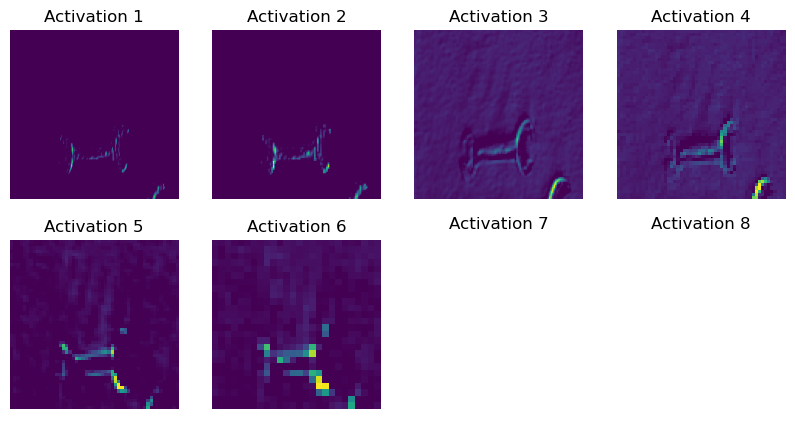

In [27]:
sample_image, _ = next(iter(test_dataset))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(sample_image)

plt.figure(figsize=(10, 5))
for i, activation in enumerate(activations):
    plt.subplot(2, 4, i+1)
    
    # Verificar la forma de activation antes de mostrarlo
    print(f"Activation {i+1} shape: {activation.shape}")
    
    # Si activation es un tensor 4D (batch_size, height, width, channels)
    if len(activation.shape) == 4:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
    # Si activation es un tensor 3D (height, width, channels)
    elif len(activation.shape) == 3:
        plt.imshow(activation[:, :, 0], cmap='viridis')
    
    plt.title(f"Activation {i+1}")
    plt.axis('off')
plt.show()